<a href="https://colab.research.google.com/github/ricochet-anr/TutoRico-2023/blob/main/TutoRico2_bispy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Bispy (Bivariate Signal with Python)
### [Documentation](https://bispy.readthedocs.io/en/latest/) and more [tutorials](https://bispy.readthedocs.io/en/latest/tutorials/index.html)

First, we need to install the required packages and bispy package

In [ ]:
!pip install numpy-quaternion
!git clone https://github.com/jflamant/bispy.git
!cd bispy/; ls; pip install .

In [6]:
import bispy as bsp
import numpy as np
import quaternion # load the quaternion module
import matplotlib.pyplot as plt

First, let's start with building and displaying a bivariate signal made of two linear chirps

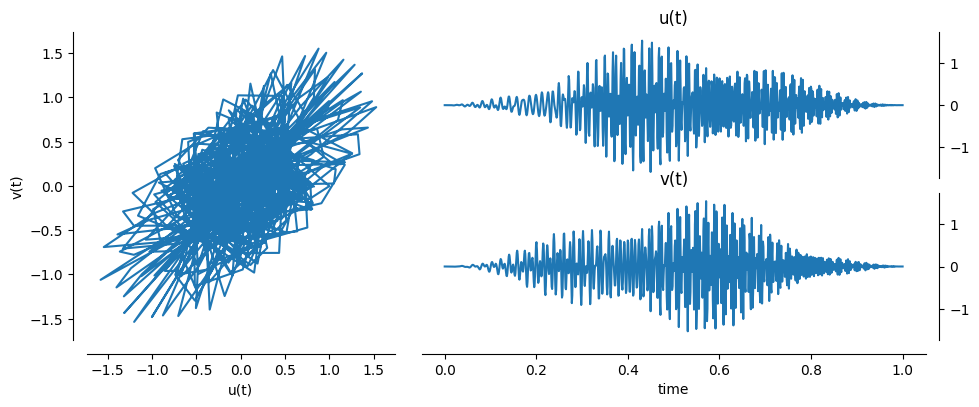

In [7]:
N = 1024 # length of the signal

# linear chirps constants
a = 250*np.pi
b = 50*np.pi
c = 150*np.pi

# time vector
t = np.linspace(0, 1, N)

# first chirp
theta1 = np.pi/4 # constant orientation
chi1 = np.pi/6-t # reversing ellipticity
phi1 = b*t+a*t**2 # linear chirp

# second chirp
theta2 = np.pi/4*10*t # rotating orientation
chi2 = 0 # constant null ellipticity
phi2 = c*t+a*t**2 # linear chirp

# common amplitude -- simply a window
env = bsp.utils.windows.hanning(N)

# define chirps x1 and x2
x1 = bsp.signals.bivariateAMFM(env, theta1, chi1, phi1)
x2 = bsp.signals.bivariateAMFM(env, theta2, chi2, phi2)

# sum it
x = x1 + x2

fig, ax = bsp.utils.visual.plot2D(t, x)

Next, we can compute the Quaternion Short Term Fourier Transform (Q-STFT) of the signal $x$

First step is to initialize the Q-STFT object

In [9]:
S = bsp.timefrequency.QSTFT(x,t)

Then compute :

In [10]:
S.compute(window='hamming', nperseg=101, noverlap=100, nfft=N)

Computing Time-Frequency Stokes parameters


From here, we can have a look at the Stokes parameters $S_0, S_1, S_2$ and $S_3
$

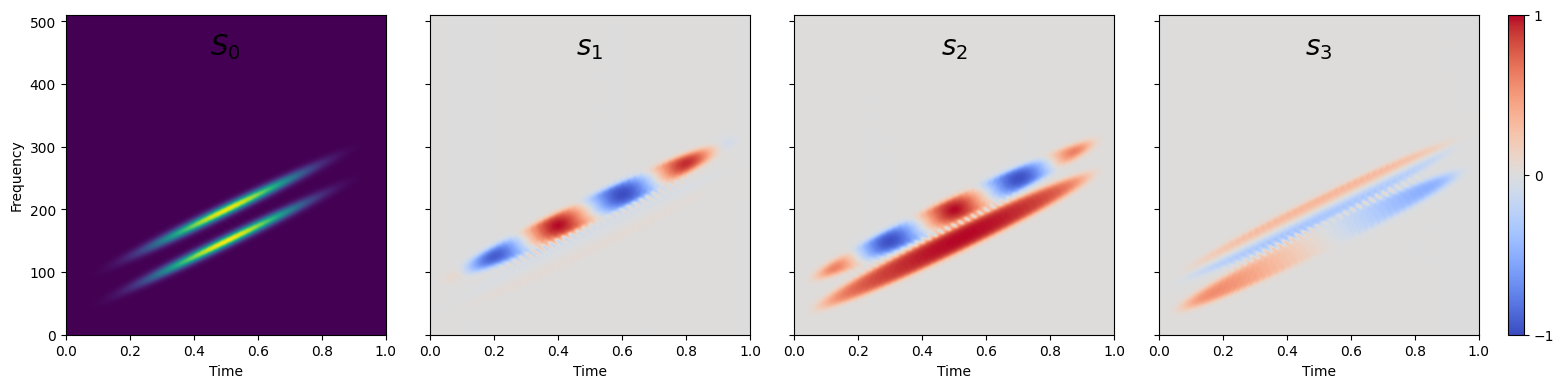

In [11]:
fig, ax = S.plotStokes()

An other way to represent the instantaneous polarization parameters is to locally (on the ridge) compute the ellipticity $\chi$ and orientation $\theta$ parameters.

First, we extract the ridges from the Q-STFT object


In [12]:
S.extractRidges()

Extracting ridges
Ridge added
Ridge added
2 ridges were recovered.


now we can plot the time-frequency representation (quivertdecim controls the decimation parameter for smooth display of the orientation paramter)

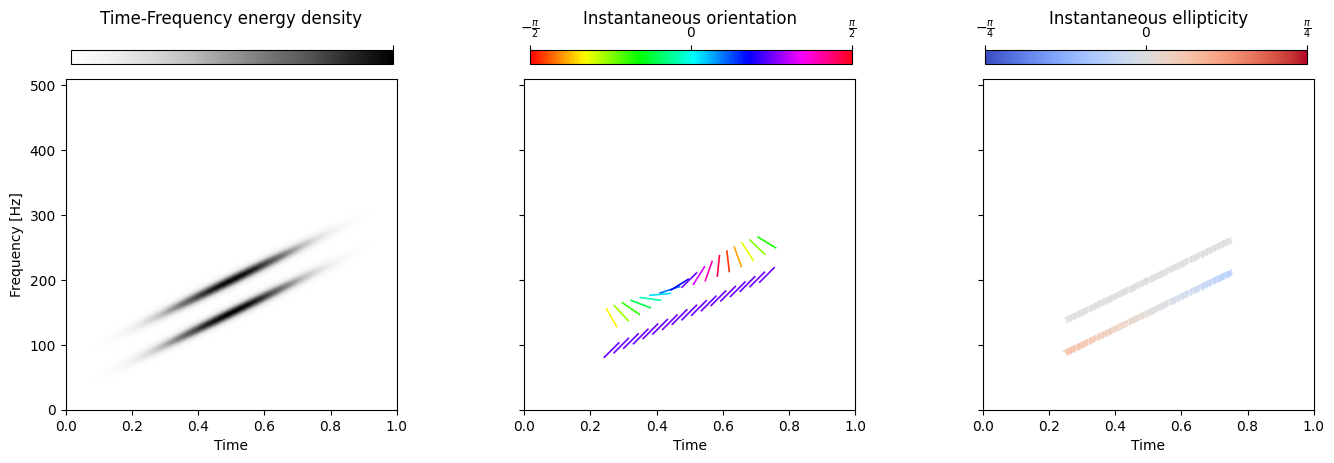

In [13]:
fig, ax = S.plotRidges(quivertdecim=30)